# Library importation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as mt
import statsmodels.stats.api as sms
import scipy.stats as sc
import scipy.stats as st 
from scipy.stats import norm
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading data set

In [ ]:
# mounting my drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# reading the csv file
data = pd.read_csv('/content/drive/My Drive/week 3/AdSmartABdata.csv')

# Explanatory Data Analysis

I perfrom EDA to analyze our data,to find any outliers,missing values and identify unique values.

## Understanding my data

### Data at a glance.

In [ ]:
# checking the first elements in dataset
data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [ ]:
# checking the last elements  in dataset
data.tail()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0
8076,fffbb9ff-568a-41a5-a0c3-6866592f80d8,control,2020-07-10,14,Samsung SM-G960F,6,Facebook,0,0


In [ ]:
# finding the shape of our dataset
data.shape

(8077, 9)

In [ ]:
# finding the size of our dataset
data.size

72693

## Exploring data

### Data Features

In [ ]:
# data types of each column in dataset
data_types = pd.DataFrame(data.dtypes,
                          columns=['Data Type'])
data_types

,Data Type
auction_id,object
experiment,object
date,object
hour,int64
device_make,object
platform_os,int64
browser,object
yes,int64
no,int64


In [ ]:
# summary of dataset

summary = data.info()
          
summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


### Statistical summary

In [ ]:
# finding the statical summary of our dataset
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
hour,8077.0,11.615080,5.734879,0.0,7.0,13.0,15.0,23.0
platform_os,8077.0,5.947134,0.224333,5.0,6.0,6.0,6.0,7.0
yes,8077.0,0.070818,0.256537,0.0,0.0,0.0,0.0,1.0
no,8077.0,0.083075,0.276013,0.0,0.0,0.0,0.0,1.0


In [ ]:
# calculating quartile and Inter quartile range
Q3 = data.quantile(0.75)
Q1 = data.quantile(0.25)
IQR = Q3 -Q1
IQR

hour           8.0
platform_os    0.0
yes            0.0
no             0.0
dtype: float64

### Data quality check

In [ ]:
# unique values in dataset
unique_values = pd.DataFrame(columns=['Unique Values'])
for x in list(data.columns.values):
    unique_values.loc[x] = [data[x].nunique()]
# sorting the values
unique_values = unique_values.sort_values(by='Unique Values', ascending=True)
unique_values

,Unique Values
experiment,2
yes,2
no,2
platform_os,3
date,8
browser,15
hour,24
device_make,270
auction_id,8077


In [ ]:
#  missing values in dataset
missing_data_counts = pd.DataFrame(data.isnull().sum(),
                                   columns=(['Missing Values']))
# sorting the missing_data_count
missing_data_counts = missing_data_counts.sort_values(by='Missing Values', ascending=True)
missing_data_counts

,Missing Values
auction_id,0
experiment,0
date,0
hour,0
device_make,0
platform_os,0
browser,0
yes,0
no,0


In [ ]:
present_data = pd.DataFrame(data.count(),
                                   columns=['Present Values'])
present_data

,Present Values
auction_id,8077
experiment,8077
date,8077
hour,8077
device_make,8077
platform_os,8077
browser,8077
yes,8077
no,8077


In [ ]:
data_quality_report = data_types.join(present_data).join(missing_data_counts).join(unique_values)
print("\nData Quality Report")
print("Total records: {}".format(len(data.index)))
data_quality_report


Data Quality Report
Total records: 8077


,Data Type,Present Values,Missing Values,Unique Values
auction_id,object,8077,0,8077
experiment,object,8077,0,2
date,object,8077,0,8
hour,int64,8077,0,NaN
device_make,object,8077,0,270
platform_os,int64,8077,0,NaN
browser,object,8077,0,15
yes,int64,8077,0,NaN
no,int64,8077,0,NaN


### Variable types
 

#### 1.Non_numeric

In [ ]:
non_numeric_data = data.select_dtypes(include=['object']).copy()
non_numeric_data

,auction_id,experiment,date,device_make,browser
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,Generic Smartphone,Chrome Mobile
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,Generic Smartphone,Chrome Mobile
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,E5823,Chrome Mobile WebView
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,Samsung SM-A705FN,Facebook
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,Generic Smartphone,Chrome Mobile
...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,Generic Smartphone,Chrome Mobile
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,Generic Smartphone,Chrome Mobile
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,Generic Smartphone,Chrome Mobile
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,Samsung SM-A515F,Samsung Internet


In [ ]:
# unique values of categorical variables dataset
unique_values = pd.DataFrame(columns=['Unique Values'])
for x in list(non_numeric_data.columns.values):
    unique_values.loc[x] = [non_numeric_data[x].nunique()]
# sorting the values
unique_values = unique_values.sort_values(by='Unique Values', ascending=True)
unique_values

,Unique Values
experiment,2
date,8
browser,15
device_make,270
auction_id,8077


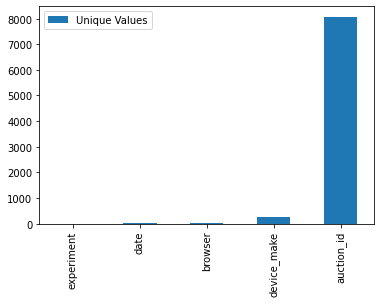

In [ ]:
unique_values.plot(kind ='bar')

In [ ]:
experiment = data['experiment'].value_counts()
experiment

control    4071
exposed    4006
Name: experiment, dtype: int64

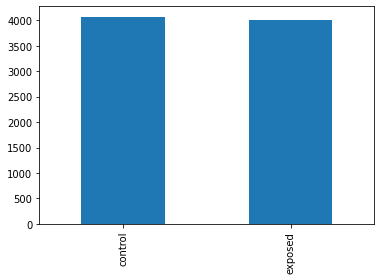

In [ ]:
experiment.plot(kind ='bar')

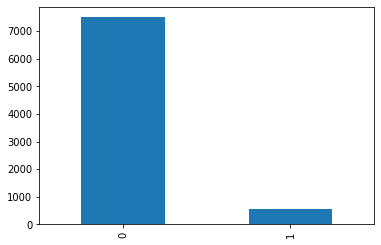

In [ ]:
yes= data['yes'].value_counts()
yes.plot(kind='bar')

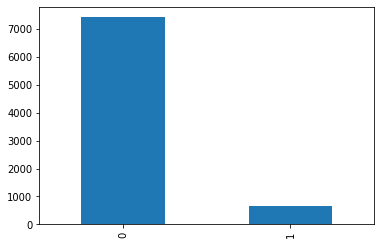

In [ ]:
no = data['no'].value_counts()
no.plot(kind='bar')

#### 2.Numeric

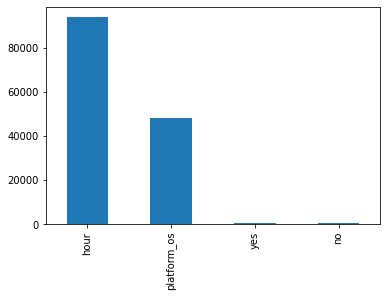

In [ ]:
numeric_data = data.select_dtypes(include=['int64']).copy()
numeric_data = numeric_data.sum()
numeric_data.plot(kind = 'bar')

# Hypothesis testing

## Classical  p-value based algorithm

In [ ]:
# Aligning data with metrics definition
control = (data["experiment"] == "control") & (data["no"] == "1")
index_to_drop1 = data[control].index
data = data.drop(index_to_drop1)

test = (data["experiment"] == "exposed") & (data['yes'] == "1")
index_to_drop2 = data[test].index
data = data.drop(index_to_drop2)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [ ]:
control = data["experiment"] == "control"
control = data[control]
control.shape

(4071, 9)

In [ ]:
test = data["experiment"] == "exposed"
test = data[test]
test.shape

(4006, 9)

In [ ]:
# calculating :
# the % split between users who saw creative ad vs dummy ad
 
control = data["experiment"] == "control"
control = data[control]
conversions_control = control['yes'].sum()
total_users_control = control['yes'].count()
 
 
test = data["experiment"] == "exposed"
test = data[test]
conversions_test = test["yes"].sum()
total_users_test = test["yes"].count()
 
 
print("Split of control users saw dummy ad vs exposed users who creative ad : ", 
          round(total_users_control / data['no'].count() * 100, 2), "% ",
          round((total_users_test / data["yes"].count()) * 100, 2), "%")
 
#count number of users who converted in each group
print("Number of control users who viewed dummy ad: ", conversions_control)
print("Percentage of control users who converted: ", round((conversions_control / total_users_control) * 100, 2), "%")
 
test = (data["experiment"] == "exposed")
print("Number of exposed users who viewed creative ad: ", conversions_test)
print("Percentage of exposed users who converted: ", round((conversions_test/ total_users_test) * 100, 2), "%")

Split of control users saw dummy ad vs exposed users who creative ad :  50.4 %  49.6 %
Number of control users who viewed dummy ad:  264
Percentage of control users who converted:  6.48 %
Number of exposed users who viewed creative ad:  308
Percentage of exposed users who converted:  7.69 %


### Setting parameters

In [ ]:
#  defining parameters
 
# p_A is the conversion rate of the control group
# p_B is the conversion rate of the test group
p_A = conversions_control / total_users_control
p_B = (conversions_test / total_users_test)
bcr = p_A 
practical_significance = 0.01 #user defined
confidence_level = 0.05 #user defined, for a 95% confidence interval
sensitivity = 0.8 #user defined
 
effect_size = sms.proportion_effectsize(bcr, bcr  + practical_significance)
sample_size = sms.NormalIndPower().solve_power(effect_size = effect_size, power = sensitivity, 
                                               alpha = confidence_level, ratio=1)
print("Required sample size: ", round(sample_size), " per experiment")

Required sample size:  10186  per experiment


In [ ]:
#Calculate pooled probability
pooled_prob = (conversions_control + conversions_test) / (total_users_control + total_users_test)

In [ ]:
#Calculate pooled standard error and margin of error
se_pooled = mt.sqrt(pooled_prob * (1 - pooled_prob) * (1 / total_users_control + 1 / total_users_test))
z_score = st.norm.ppf(1 - confidence_level / 2)
p_value = norm.sf(z_score)
margin_of_error = se_pooled * z_score
 
#Calculate dhat, the estimated difference between probability of conversions in the experiment and control groups
d_hat = p_B - p_A
 
#Test if we can reject the null hypothesis
lower_bound = d_hat - margin_of_error
upper_bound = d_hat + margin_of_error
 
z_score,p_value

(1.959963984540054, 0.025)

In [ ]:
if practical_significance < lower_bound:
    print("Do not reject the null hypothesis")
else: 
    print("Reject null hypothesis")
    
print("The lower bound of the confidence interval is ", round(lower_bound * 100, 2), "%")
print("The upper bound of the confidence interval is ", round(upper_bound * 100, 2), "%")

Reject null hypothesis
The lower bound of the confidence interval is  0.08 %
The upper bound of the confidence interval is  2.32 %


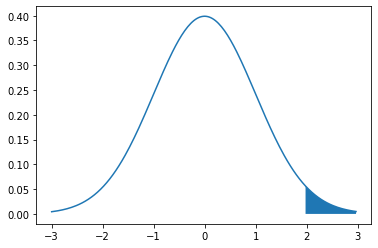

In [ ]:
z = np.arange(-3,3,0.03)
y1 = z[z>z_score]
y2 = norm.pdf(z[z>z_score])
plt.plot(z, 
         norm.pdf(z))
plt.fill_between(z[z>z_score], norm.pdf(z[z>z_score]))
plt.show()

The p_value = 0.025 is lower that alpha = confidence level = 0.05 = we reject the null hypothesis.

The observation attributed to the p_value.

This means heres is trully no difference between the control and test group.



#Task 2.2: Machine Learning
 
1.In max three statements, make a problem formulation for machine learning and specify the target variable

**In a real world, the distribution of people in test and control for each segment should be the same,   to test if the randomization worked,we use machine learning to check**  ** target variable is  the yes column**
 
Split the data into 70% training, 20% validation, and 10% test sets. 
 
Based on the reading material provided, apply machine learning to the training data. Train a machine learning model using 5-fold cross validation the following 3 different algorithms:


Logistic Regression 
 
Decision Trees
 
XGBoost
 
Define the appropriate loss function  for the model using the validation data. 
 
Compute feature importance - what’s driving the model? Which parameters are important predictors for the different ML models? What contributes to the goal of gaining more “Yes” results?
 
Which data features are relevant to predicting the target variable?
 
Explain what the difference is between using A/B testing to test a hypothesis vs using Machine learning to learn the viability of the same effect?
 
Explain the purpose of training using k-fold cross validation instead of using the whole data to train the ML models?
 
What information do you gain using the Machine Learning approach that you couldn’t obtain using A/B testing?

In [ ]:
# Initialize label encoder categorical data to assign numeric values to categorical variables for the purpose of training model with machine learning
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
encode_exp = label_encoder.fit_transform(data['experiment'])
encode_dev = label_encoder.fit_transform(data['device_make'])
encode_brw = label_encoder.fit_transform(data['browser'])
encode_date = label_encoder.fit_transform(data['date'])
features = pd.DataFrame([encode_exp,encode_dev, encode_brw,encode_date]).T
features.columns = ['experiment','device_make','browser','date']
features.head()

,experiment,device_make,browser,date
0,1,46,2,7
1,1,46,2,4
2,1,29,3,2
3,0,137,6,0
4,0,46,2,0


In [ ]:
target = data.yes

In [ ]:
X = features
y = target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train.shape, y_train.shape
X_test.shape, y_test.shape


((808, 4), (808,))

In [ ]:
X_train

,experiment,device_make,browser,date
2812,0,63,2,1
5380,1,46,2,5
2797,0,46,6,7
5159,0,46,2,2
5687,0,46,2,6
...,...,...,...,...
1121,1,46,2,7
7466,0,46,2,2
5139,0,63,3,0
781,1,205,3,1


### Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import  r2_score, mean_absolute_error,mean_squared_error 

def calculate_metrics(y_test, y_preds):
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    r_sq = r2_score(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)

    print('RMSE Score: {}'.format(rmse))
    print('R2_Squared: {}'.format(r_sq))
    print('MAE Score: {}'.format(mae))



In [ ]:
dtree = DecisionTreeRegressor(max_depth=5, min_samples_leaf =4,random_state=7)
dtree.fit(X_train, y_train)
y_preds = dtree.predict(X_test)

calculate_metrics(y_test, y_preds)

RMSE Score: 0.24864615981818283
R2_Squared: -0.008703232918937598
MAE Score: 0.12669874918048218


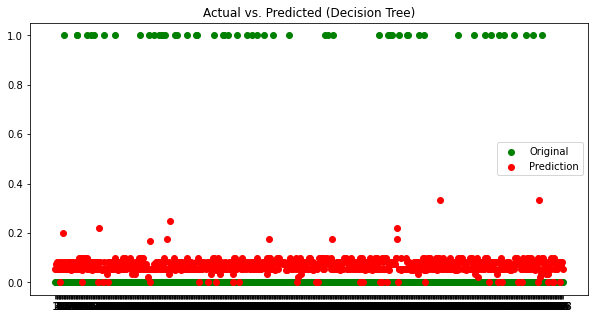

In [ ]:
def plot_preds(y_test, y_preds, model_name):
    N = len(y_test)
    plt.figure(figsize=(10,5))
    original = plt.scatter(np.arange(1, N+1), y_test, c='green')
    prediction = plt.scatter(np.arange(1, N+1), y_preds, c='red')
    plt.xticks(np.arange(1, N+1))
    #plt.xlabel('# observation')
    #plt.ylabel('yes')
    title = 'Actual vs. Predicted ({})'.format(model_name)
    plt.title(title)
    plt.legend((original, prediction), ('Original', 'Prediction'))
    plt.show()

plot_preds(y_test, y_preds, 'Decision Tree')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


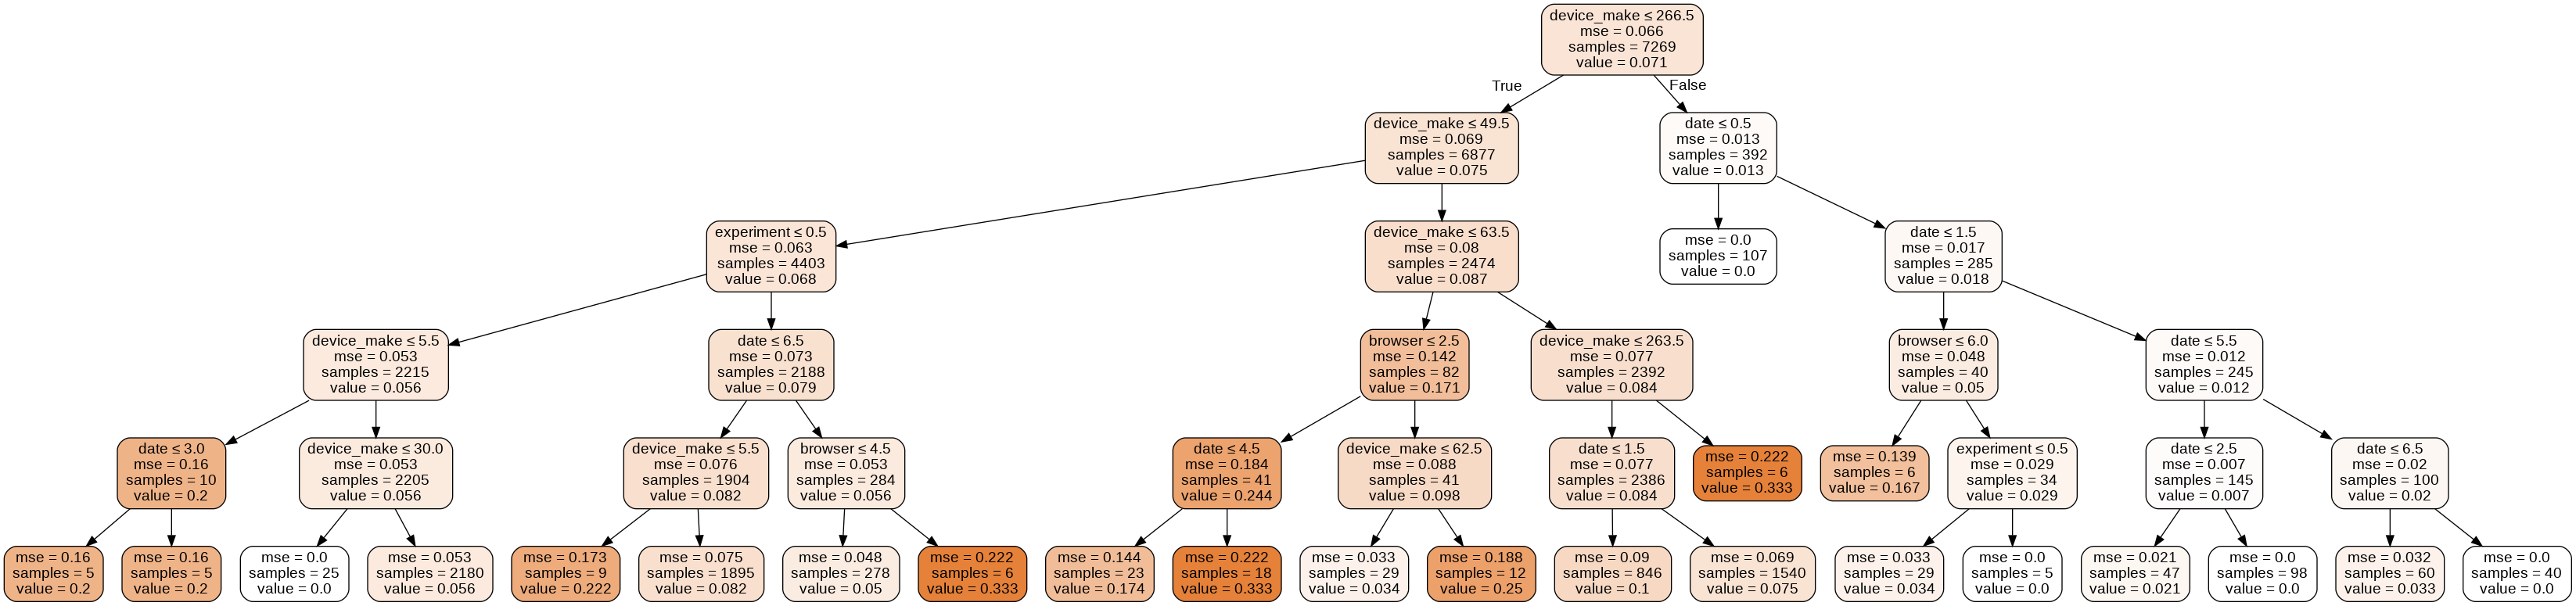

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data, 
                feature_names=X_train.columns,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())



### logistic regression model

In [ ]:
# Initialize logistic regression model
from sklearn import linear_model
from sklearn.metrics import accuracy_score
log_model = linear_model.LogisticRegression(solver='lbfgs')

model = log_model.fit(X_train, y_train)
model.fit(X_train,y_train)

preds = model.predict(X_test)

calculate_metrics(y_test, y_preds)

RMSE Score: 0.24864615981818283
R2_Squared: -0.008703232918937598
MAE Score: 0.12669874918048218


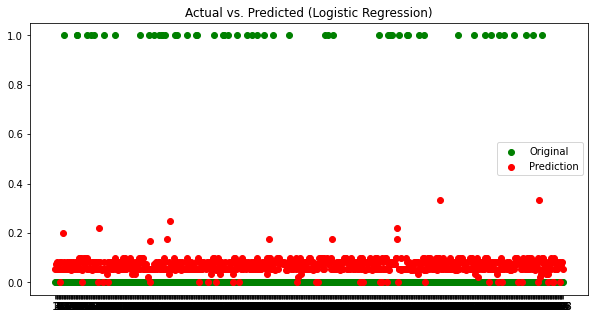

In [ ]:
plot_preds(y_test, y_preds, 'Logistic Regression')

In [ ]:

feature_importance = abs(model.coef_)# get importance
feature_importance

array([[0.26959437, 0.0007698 , 0.01058644, 0.02647655]])

### XGB

In [ ]:
#initialize XGBoost
#!pip install xgboost
import xgboost as xgb
XGB_model = xgb.XGBClassifier()
data_dmatrix = xgb.DMatrix(data=X,label=y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[18:34:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# k-fold
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[18:34:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:34:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:34:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:34:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:34:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.463821,0.000144,0.463819,0.000223
1,0.432278,0.000264,0.432288,0.000467
2,0.404917,0.000386,0.404935,0.000737
3,0.381320,0.000497,0.381331,0.001001
4,0.361048,0.000603,0.361066,0.001283


In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.256411
Name: test-rmse-mean, dtype: float64


In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[18:34:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


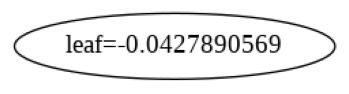

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [30, 10]
plt.show()

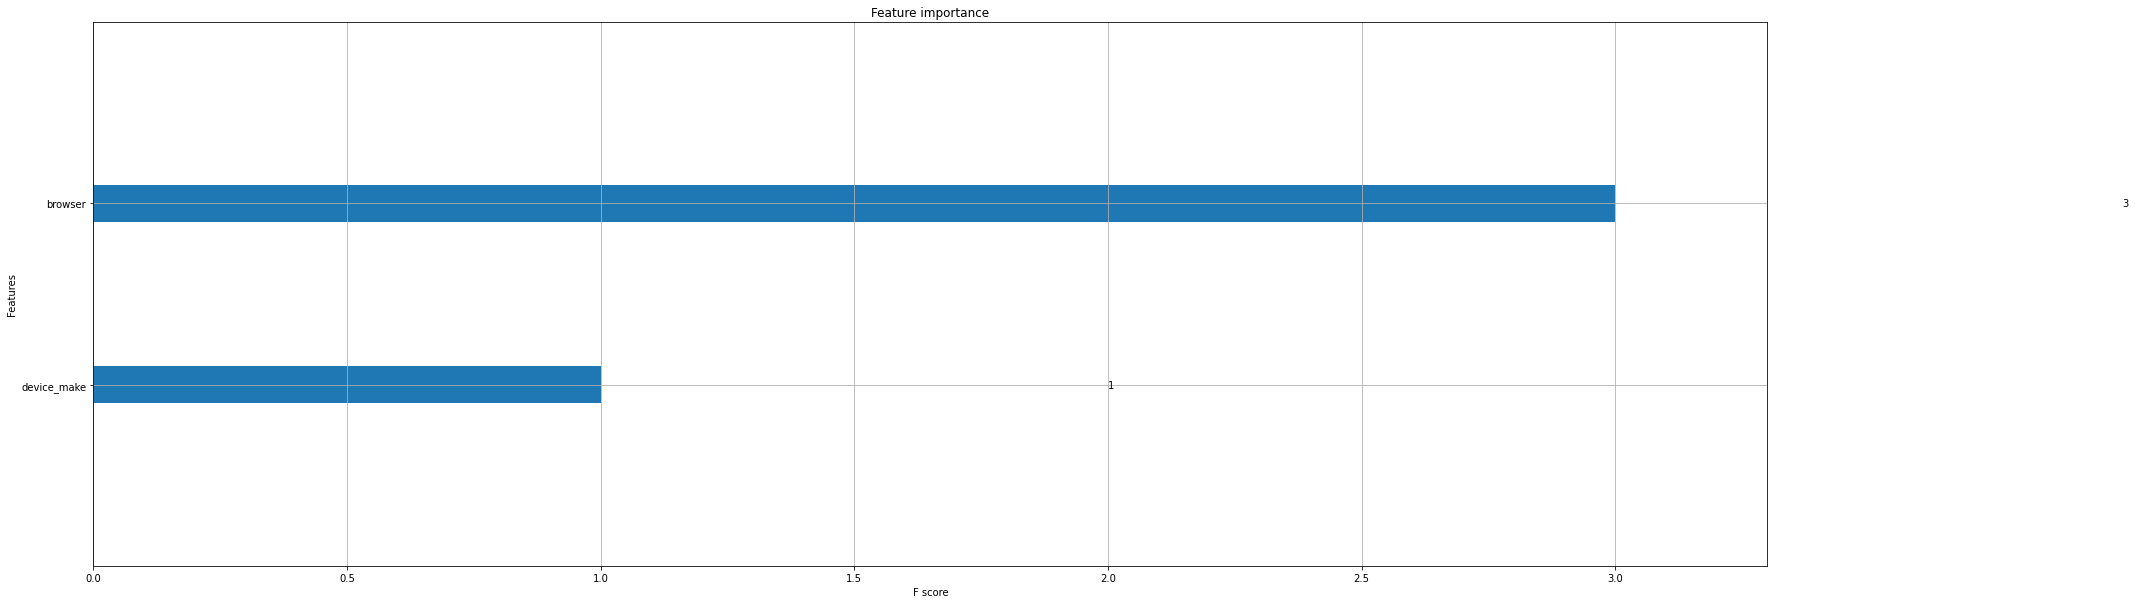

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()